# Iris Flower Prediction Analysis

### Context
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines (check 'Iris Flower Analysis' to check all the models I used)

### Work Flow
Data ---> Data Preprocessing ---> Data Analysis ---> Model Preparation & Prediction ---> Model Evaluation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [2]:
# loading the data
iris = pd.read_csv('IRIS.csv')
print(iris.shape)
iris.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


We load the dataset. The size of the dataset presented to us is 5 columns and 150 rows. On checking the first 5 rows of the dataframe, we have columns sepal length, sepal width, paetal length, petal width and species. Let's find more information about out dataframe.

### Data Preprocessing

In [3]:
# getting information of the dataframe
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


From the above information;
there are 4 columns with float datatypes and 1 column with object datatype. 

In [4]:
# checking for missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

On checking for missing values, we are glad to find that our dataset has no missing values. Let's continue.

### Data Analysis

In [5]:
# check the various species of iris flowers
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

There are three specific species of iris flowers we are dealing with:
1. Iris - Setosa
2. Iris - Versicolor
3. Iris -  Virginica  
And they are all in equal numbers in the dataset

###### performing data visualization

In [6]:
# set the background of the incoming graphs
sns.set()

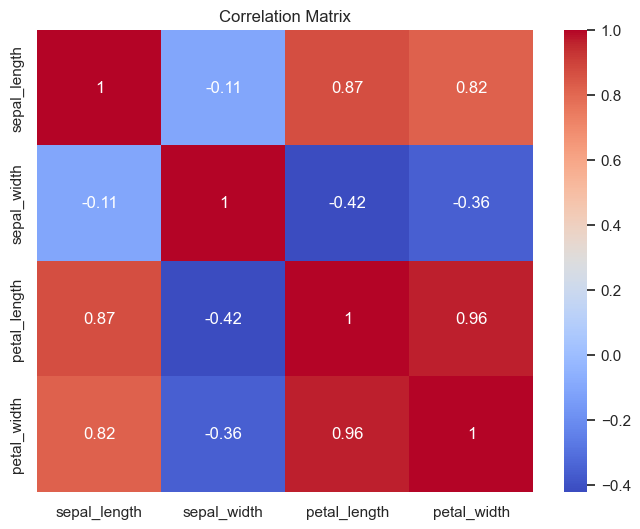

In [10]:
# Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, we notice:
1. There's a high positive correlation between sepal length and petal length (0.87).
2. There's a high positive correlation between sepal length and petal width (0.82).
3. There's a high positive correlation between petal length and petal widht (0.96).

What I can infer from this is that the all these shows the growth rate of the iris flowers ie as they grow, their sepals and petals grow proportional. Let's infer more!

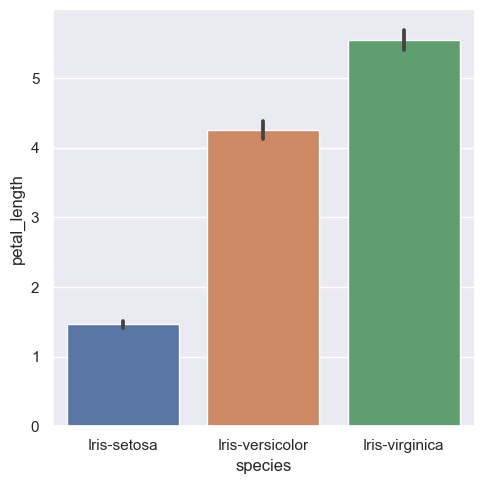

In [11]:
# check the various petal length for the iris flower species
sns.catplot(x='species', y='petal_length', data=iris, kind='bar')
plt.show()

From this graph, we realize that among the 3 species of iris flowers, iris-setosa species has the shortest petal length while the iris-virginica species have the largest petal length.

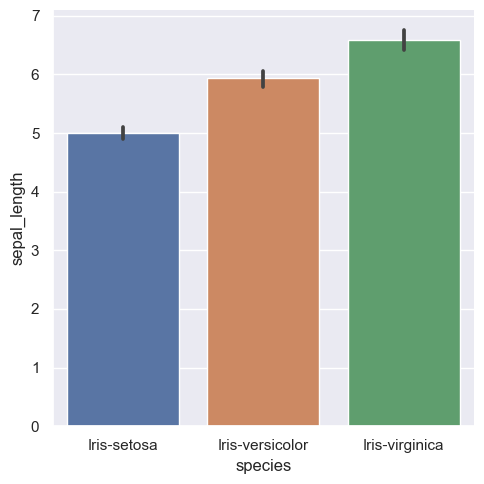

In [12]:
# check the various sepal length for the iris flower species
sns.catplot(x='species', y='sepal_length', data=iris, kind='bar')
plt.show()

From this graph, we realize that among the 3 species of iris flowers, iris-setosa species has the shortest sepal length while the iris-virginica species have the largest sepal length though it's not by a really large margin as compared to petal length.

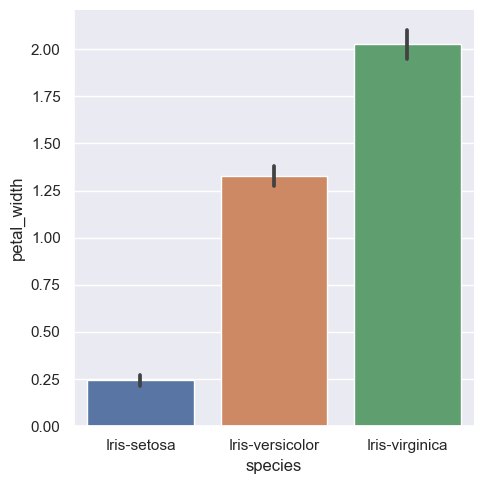

In [13]:
# check the various petal width for the iris flower species
sns.catplot(x='species', y='petal_width', data=iris, kind='bar')
plt.show()

From this graph, we realize that among the 3 species of iris flowers, iris-setosa species has the shortest petal width while the iris-virginica species have the largest petal width.

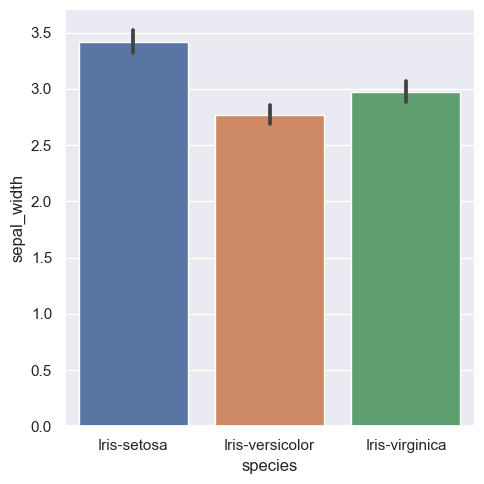

In [14]:
# check the various sepal width for the iris flower species
sns.catplot(x='species', y='sepal_width', data=iris, kind='bar')
plt.show()

From this graph, here, the order changes. We realize that among the 3 species of iris flowers, iris-setosa species has the largest sepal width while the iris-versicolor  species have the smallest sepal width with iris-virginica being in the middle.

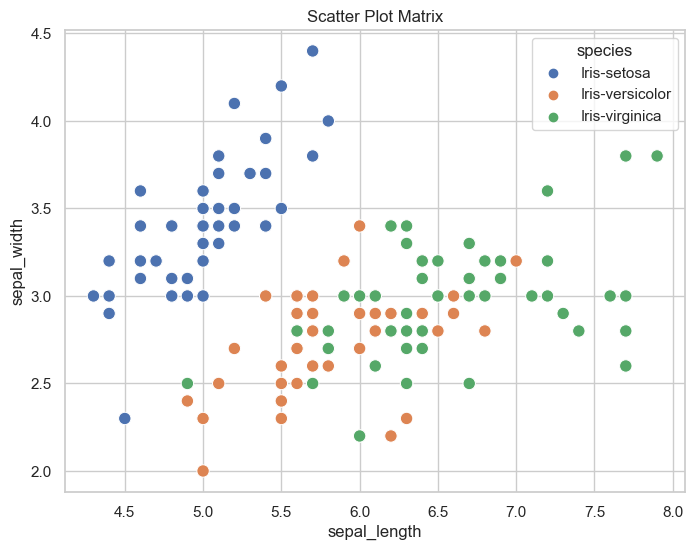

In [15]:
# Scatter plot matrix
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width', hue='species', s=80)
plt.title('Scatter Plot Matrix')
plt.show()

The scatter plot matrix graph summarizes our visualization.
Inference:
1. Iris-Setosa has the smallest petals with short broad sepals. The broad sepals helps to maximize its' intake of sunlight to perform sunlight.
2. Iris-versicolar species are the most balance among the 3. Its' petal and sepals are of normal size while its' sepal has narrow width.
3. Iris-virginica have the largest petal among the 3 species, in other words, key emphasis is to attract a lot of agents of pollination. Its' sepals are narrow in length with a moderate width.  
Very interesting. Let's proceed to prediciton analysis.

### Model Preparation

In [19]:
# importing libraries for machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Train Test Split

###### preparing the data for training

In [20]:
# Separate features and labels
X = iris.drop('species', axis=1)
y = iris['species']

In [21]:
# Encode labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [22]:
# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# perform feature engineering
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###### model training and evaluation

In [24]:
# Model 1
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [25]:
# Model 2
# Create and train the logistic regression model: using the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# predict the labels for the test set
y_pred = model.predict(X_test_scaled)

# calculate the accuracy score
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy*100}")

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 100.0
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In both cases, our models predicted perfectly, so any will do.